In [ ]:
# =============================================================================
# 1. IMPORTS (some may be redundant but good for a standalone cell)
# =============================================================================
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
import os

# =============================================================================
# 2. CONFIGURATION (same as before)
# =============================================================================
SUBSET_DIR = '../data/subset/'
MODELS_DIR = '../models/'
RESULTS_DIR = '../results/'
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 25 # Train for a few more epochs

# =============================================================================
# 3. LOAD DATA (same as before)
# =============================================================================
# Assuming balanced_df is already created from the previous cell
# If not, you can reload it:
# balanced_df = pd.read_csv(...) and prepare it
train_df, val_df = train_test_split(
    balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['diagnosis']
)

# Create a separate test set from the validation data for final evaluation
val_df, test_df = train_test_split(
    val_df, test_size=0.5, random_state=42, stratify=val_df['diagnosis']
)

# --- Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255., rotation_range=20, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,
    horizontal_flip=True, fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255.) # Used for validation and testing

train_generator = train_datagen.flow_from_dataframe(...)
validation_generator = val_datagen.flow_from_dataframe(...)
# Important: Create a test generator that does NOT shuffle
test_generator = val_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=SUBSET_DIR,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1, # Process one image at a time for evaluation
    class_mode='categorical',
    shuffle=False # DO NOT SHUFFLE
)

# =============================================================================
# 4. BUILD AND TRAIN THE FINAL MODEL (EfficientNetB0)
# =============================================================================
base_model = EfficientNetB0(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n--- Training Final Model (EfficientNetB0) ---")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)
model.save(os.path.join(MODELS_DIR, 'final_model.h5'))
print(f"Final model saved to {os.path.join(MODELS_DIR, 'final_model.h5')}")


# =============================================================================
# 5. EVALUATE THE FINAL MODEL ON THE TEST SET
# =============================================================================
print("\n--- Evaluating Final Model on Test Set ---")
# Load the best performing model
final_model = load_model(os.path.join(MODELS_DIR, 'final_model.h5'))

# Get predictions
predictions = final_model.predict(test_generator, steps=len(test_df))
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --- Calculate and Print Metrics ---
kappa = cohen_kappa_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_labels)
print(f"Cohen's Kappa Score: {kappa:.4f}")
print("\nClassification Report:\n", report)

# --- Generate and Save Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Final Model")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig(os.path.join(RESULTS_DIR, 'final_model_confusion_matrix.png'))
print(f"Confusion matrix saved to {os.path.join(RESULTS_DIR, 'final_model_confusion_matrix.png')}")
plt.show()

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


c:\Users\I768800\Documents\MTech_Project\diabetic-retinopathy-MTech\.venv\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 954 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(
c:\Users\I768800\Documents\MTech_Project\diabetic-retinopathy-MTech\.venv\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 239 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(
c:\Users\I768800\Documents\MTech_Project\diabetic-retinopathy-MTech\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

In [ ]:
# =============================================================================
# 1. IMPORTS (some may be redundant but good for a standalone cell)
# =============================================================================
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
import os

# =============================================================================
# 2. CONFIGURATION (same as before)
# =============================================================================
SUBSET_DIR = '../data/subset/'
MODELS_DIR = '../models/'
RESULTS_DIR = '../results/'
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 25 # Train for a few more epochs

# =============================================================================
# 3. LOAD DATA (same as before)
# =============================================================================
# Assuming balanced_df is already created from the previous cell
# If not, you can reload it:
# balanced_df = pd.read_csv(...) and prepare it
train_df, val_df = train_test_split(
    balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['diagnosis']
)

# Create a separate test set from the validation data for final evaluation
val_df, test_df = train_test_split(
    val_df, test_size=0.5, random_state=42, stratify=val_df['diagnosis']
)

# --- Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255., rotation_range=20, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,
    horizontal_flip=True, fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255.) # Used for validation and testing

train_generator = train_datagen.flow_from_dataframe(...)
validation_generator = val_datagen.flow_from_dataframe(...)
# Important: Create a test generator that does NOT shuffle
test_generator = val_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=SUBSET_DIR,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1, # Process one image at a time for evaluation
    class_mode='categorical',
    shuffle=False # DO NOT SHUFFLE
)

# =============================================================================
# 4. BUILD AND TRAIN THE FINAL MODEL (EfficientNetB0)
# =============================================================================
base_model = EfficientNetB0(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n--- Training Final Model (EfficientNetB0) ---")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)
model.save(os.path.join(MODELS_DIR, 'final_model.h5'))
print(f"Final model saved to {os.path.join(MODELS_DIR, 'final_model.h5')}")


# =============================================================================
# 5. EVALUATE THE FINAL MODEL ON THE TEST SET
# =============================================================================
print("\n--- Evaluating Final Model on Test Set ---")
# Load the best performing model
final_model = load_model(os.path.join(MODELS_DIR, 'final_model.h5'))

# Get predictions
predictions = final_model.predict(test_generator, steps=len(test_df))
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --- Calculate and Print Metrics ---
kappa = cohen_kappa_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_labels)
print(f"Cohen's Kappa Score: {kappa:.4f}")
print("\nClassification Report:\n", report)

# --- Generate and Save Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Final Model")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig(os.path.join(RESULTS_DIR, 'final_model_confusion_matrix.png'))
print(f"Confusion matrix saved to {os.path.join(RESULTS_DIR, 'final_model_confusion_matrix.png')}")
plt.show()

In [1]:
import shutil
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [22]:
print("Preapring full dataframe")
df = pd.read_csv(CSV_PATH)
df['id_code'] = df['id_code'].astype(str) + '.png'
df['diagnosis'] = df['diagnosis'].astype(str)

# First, split into training+validation and a separate test set (e.g., 80% train/val, 20% test)
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['diagnosis'])
# Now split the remaining data into training and validation (e.g., 80% of remainder for train)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df['diagnosis'])


print(f"Total images: {len(df)}")
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Preapring full dataframe
Total images: 3662
Training set size: 2343
Validation set size: 586
Test set size: 733


In [23]:
print("Setting up data generators")
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical'
)
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical'
)
test_generator = val_datagen.flow_from_dataframe(
    dataframe=test_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=1, class_mode='categorical', shuffle=False
)

Setting up data generators
Found 2343 validated image filenames belonging to 5 classes.
Found 586 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [28]:
print("\n Calculating Class Weights to handle imbalance")
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Calculated Class Weights:", class_weights_dict)



 Calculating Class Weights to handle imbalance
Calculated Class Weights: {0: np.float64(0.4057142857142857), 1: np.float64(1.9772151898734178), 2: np.float64(0.7333333333333333), 3: np.float64(3.8097560975609754), 4: np.float64(2.4793650793650794)}


In [29]:
base_model = EfficientNetB0(
    input_shape=(IMG_SIZE, IMG_SIZE, 3), 
    include_top=False, 
    weights='imagenet'
    )
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Define Callbacks
model_checkpoint = ModelCheckpoint(
    filepath=os.path.join(MODELS_DIR, 'best_model.h5'),
    save_best_only=True, monitor='val_accuracy', mode='max', verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1
)


In [31]:
# Stage 1: Feature Extraction
print("\n--- Starting Stage 1: Feature Extraction ---")
history = model.fit(
    train_generator,
    epochs=INITIAL_EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    validation_steps=len(val_df) // BATCH_SIZE,
    callbacks=[model_checkpoint, reduce_lr],
    class_weight=class_weights_dict
)


--- Starting Stage 1: Feature Extraction ---


c:\Users\I768800\Documents\MTech_DR_Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4937 - loss: 1.4276
Epoch 1: val_accuracy improved from -inf to 0.70833, saving model to ../models/best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 297s 4s/step - accuracy: 0.4943 - loss: 1.4264 - val_accuracy: 0.7083 - val_loss: 0.8051 - learning_rate: 0.0010
Epoch 2/15
 1/73 ━━━━━━━━━━━━━━━━━━━━ 29s 416ms/step - accuracy: 0.5312 - loss: 1.1827

c:\Users\I768800\Documents\MTech_DR_Project\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.70833 to 0.72743, saving model to ../models/best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 593ms/step - accuracy: 0.5312 - loss: 1.1827 - val_accuracy: 0.7274 - val_loss: 0.7965 - learning_rate: 0.0010
Epoch 3/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6371 - loss: 1.2190
Epoch 3: val_accuracy improved from 0.72743 to 0.79514, saving model to ../models/best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.6372 - loss: 1.2178 - val_accuracy: 0.7951 - val_loss: 0.6742 - learning_rate: 0.0010
Epoch 4/15
 1/73 ━━━━━━━━━━━━━━━━━━━━ 29s 415ms/step - accuracy: 0.6250 - loss: 1.0555
Epoch 4: val_accuracy did not improve from 0.79514
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 553ms/step - accuracy: 0.6250 - loss: 1.0555 - val_accuracy: 0.7951 - val_loss: 0.6666 - learning_rate: 0.0010
Epoch 5/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6643 - loss: 1.0279
Epoch 5: val_accuracy did not improve from 0.79514
73/73 ━━━━━━━━━━━━━━━━━━━━ 225s 3s/step - accuracy: 0.6642 - loss: 1.0285 - val_accuracy: 0.6597 - val_loss: 0.8231 - learning_rate: 0.0010
Epoch 6/15
 1/73 ━━━━━━━━━━━━━━━━━━━━ 30s 418ms/step - accuracy: 0.6562 - loss: 0.7752
Epoch 6: val_accuracy did not improve from 0.79514
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 572ms/step - accuracy: 0.6562 - loss: 0.7752 - val_accuracy: 0.6597 - val_loss: 0.8212 - learning_rate: 0.0010
Epoch 7/15
73/73 ━━━━━━━━━

In [34]:
# Stage 2: fine tuning:
print("\nStarting fine tuning")
base_model.trainable = True
fine_tune_at = 200
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


Starting fine tuning


In [35]:
FINE_TUNE_EPOCHS = 15
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

history_fine = model.fit(
    train_generator,
    epochs=TOTAL_EPOCHS,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator,
    steps_per_epoch=len(train_df) // BATCH_SIZE, 
    validation_steps=len(val_df) // BATCH_SIZE,   
    callbacks=[model_checkpoint, reduce_lr]
)
print("fine tuning complete.")


Epoch 15/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6669 - loss: 0.8670
Epoch 15: val_accuracy did not improve from 0.79514
73/73 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.6670 - loss: 0.8667 - val_accuracy: 0.7292 - val_loss: 0.6798 - learning_rate: 1.0000e-05
Epoch 16/30
 1/73 ━━━━━━━━━━━━━━━━━━━━ 37s 519ms/step - accuracy: 0.6562 - loss: 0.8757

c:\Users\I768800\Documents\MTech_DR_Project\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 16: val_accuracy did not improve from 0.79514
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 597ms/step - accuracy: 0.6562 - loss: 0.8757 - val_accuracy: 0.7292 - val_loss: 0.6826 - learning_rate: 1.0000e-05
Epoch 17/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6951 - loss: 0.8040
Epoch 17: val_accuracy did not improve from 0.79514
73/73 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.6952 - loss: 0.8038 - val_accuracy: 0.7448 - val_loss: 0.6564 - learning_rate: 1.0000e-05
Epoch 18/30
 1/73 ━━━━━━━━━━━━━━━━━━━━ 37s 516ms/step - accuracy: 0.6562 - loss: 0.7595
Epoch 18: val_accuracy did not improve from 0.79514
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 554ms/step - accuracy: 0.6562 - loss: 0.7595 - val_accuracy: 0.7448 - val_loss: 0.6630 - learning_rate: 1.0000e-05
Epoch 19/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7064 - loss: 0.8079
Epoch 19: val_accuracy did not improve from 0.79514
73/73 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.7066 - loss: 0.8074 - val_accuracy: 0.7604 - 


Plotting full learning curves


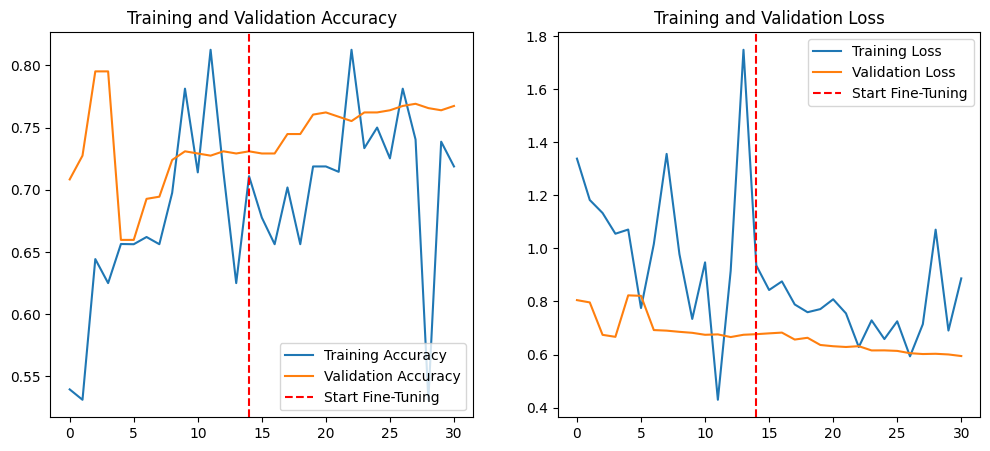

In [36]:
print("\nPlotting full learning curves")
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(INITIAL_EPOCHS-1, color='r', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(INITIAL_EPOCHS-1, color='r', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig(os.path.join(RESULTS_DIR, 'full_dataset_learning_curves.png'))
plt.show()

In [37]:
print("\nEvaluating on test set")
best_model = tf.keras.models.load_model(os.path.join(MODELS_DIR, 'best_model.h5'))
predictions = best_model.predict(test_generator, steps=len(test_df))
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

kappa = cohen_kappa_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_labels)
print(f"Cohen's Kappa Score: {kappa:.4f}")
print("\nClassification Report:")
print(report)



Evaluating on test set


c:\Users\I768800\Documents\MTech_DR_Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


733/733 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step
Cohen's Kappa Score: 0.6303

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       361
           1       0.46      0.35      0.40        74
           2       0.61      0.82      0.70       200
           3       0.44      0.31      0.36        39
           4       0.58      0.19      0.28        59

    accuracy                           0.76       733
   macro avg       0.61      0.52      0.54       733
weighted avg       0.75      0.76      0.74       733



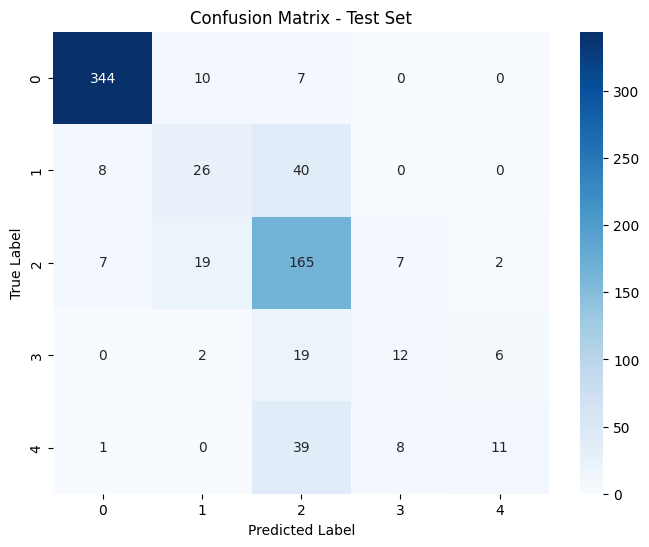

In [38]:

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(os.path.join(RESULTS_DIR, 'final_model_confusion_matrix.png'))
plt.show()

--- Preparing Full DataFrame ---
Total images: 3662
Training set size: 2343
Validation set size: 586
Test set size: 733

--- Setting up data generators ---
Found 2343 validated image filenames belonging to 5 classes.
Found 586 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.

--- Calculating Class Weights to handle imbalance ---
Calculated Class Weights: {0: np.float64(0.4057142857142857), 1: np.float64(1.9772151898734178), 2: np.float64(0.7333333333333333), 3: np.float64(3.8097560975609754), 4: np.float64(2.4793650793650794)}

--- Building Model with EfficientNetB2 base ---
Model built successfully.

--- Starting Stage 1: Feature Extraction ---


c:\Users\I768800\Documents\MTech_Project\diabetic-retinopathy-MTech\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4956 - loss: 1.4375
Epoch 1: val_accuracy improved from -inf to 0.68259, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 441s 6s/step - accuracy: 0.4964 - loss: 1.4361 - val_accuracy: 0.6826 - val_loss: 0.8072 - learning_rate: 0.0010
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6505 - loss: 1.1154
Epoch 2: val_accuracy improved from 0.68259 to 0.76792, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.6503 - loss: 1.1154 - val_accuracy: 0.7679 - val_loss: 0.7349 - learning_rate: 0.0010
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6358 - loss: 1.0638
Epoch 3: val_accuracy did not improve from 0.76792
74/74 ━━━━━━━━━━━━━━━━━━━━ 458s 6s/step - accuracy: 0.6358 - loss: 1.0639 - val_accuracy: 0.6741 - val_loss: 0.7716 - learning_rate: 0.0010
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6645 - loss: 1.0609
Epoch 4: val_accuracy did not improve from 0.76792
74/74 ━━━━━━━━━━━━━━━━━━━━ 394s 5s/step - accuracy: 0.6646 - loss: 1.0602 - val_accuracy: 0.7355 - val_loss: 0.6503 - learning_rate: 0.0010
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6854 - loss: 1.0142
Epoch 5: val_accuracy did not improve from 0.76792
74/74 ━━━━━━━━━━━━━━━━━━━━ 441s 6s/step - accuracy: 0.6852 - loss: 1.0143 - val_accuracy: 0.6638 - val_loss: 0.7253 - learning_rate: 0.0010
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 

74/74 ━━━━━━━━━━━━━━━━━━━━ 372s 5s/step - accuracy: 0.7184 - loss: 0.7256 - val_accuracy: 0.7782 - val_loss: 0.5681 - learning_rate: 1.0000e-05
Epoch 19/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7404 - loss: 0.6690
Epoch 19: val_accuracy improved from 0.77816 to 0.78669, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 404s 5s/step - accuracy: 0.7406 - loss: 0.6686 - val_accuracy: 0.7867 - val_loss: 0.5535 - learning_rate: 1.0000e-05
Epoch 20/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7789 - loss: 0.6254
Epoch 20: val_accuracy improved from 0.78669 to 0.78840, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 362s 5s/step - accuracy: 0.7785 - loss: 0.6258 - val_accuracy: 0.7884 - val_loss: 0.5423 - learning_rate: 1.0000e-05
Epoch 21/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7659 - loss: 0.6100
Epoch 21: val_accuracy improved from 0.78840 to 0.79863, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.7660 - loss: 0.6100 - val_accuracy: 0.7986 - val_loss: 0.5354 - learning_rate: 1.0000e-05
Epoch 22/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7640 - loss: 0.5990
Epoch 22: val_accuracy did not improve from 0.79863
74/74 ━━━━━━━━━━━━━━━━━━━━ 368s 5s/step - accuracy: 0.7643 - loss: 0.5988 - val_accuracy: 0.7952 - val_loss: 0.5306 - learning_rate: 1.0000e-05
Epoch 23/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7952 - loss: 0.5813
Epoch 23: val_accuracy did not improve from 0.79863
74/74 ━━━━━━━━━━━━━━━━━━━━ 410s 6s/step - accuracy: 0.7951 - loss: 0.5812 - val_accuracy: 0.7969 - val_loss: 0.5206 - learning_rate: 1.0000e-05
Epoch 24/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7955 - loss: 0.5666
Epoch 24: val_accuracy did not improve from 0.79863
74/74 ━━━━━━━━━━━━━━━━━━━━ 405s 5s/step - accuracy: 0.7955 - loss: 0.5665 - val_accuracy: 0.7952 - val_loss: 0.5180 - learning_rate: 1.0000e-05
Epoch 25/30
74/7

74/74 ━━━━━━━━━━━━━━━━━━━━ 352s 5s/step - accuracy: 0.7984 - loss: 0.5373 - val_accuracy: 0.8020 - val_loss: 0.5064 - learning_rate: 1.0000e-05
Epoch 26/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8092 - loss: 0.5268
Epoch 26: val_accuracy did not improve from 0.80205
74/74 ━━━━━━━━━━━━━━━━━━━━ 344s 5s/step - accuracy: 0.8091 - loss: 0.5270 - val_accuracy: 0.8020 - val_loss: 0.5025 - learning_rate: 1.0000e-05
Epoch 27/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8063 - loss: 0.5324
Epoch 27: val_accuracy improved from 0.80205 to 0.80717, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 392s 5s/step - accuracy: 0.8064 - loss: 0.5324 - val_accuracy: 0.8072 - val_loss: 0.4980 - learning_rate: 1.0000e-05
Epoch 28/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8040 - loss: 0.5504
Epoch 28: val_accuracy improved from 0.80717 to 0.80887, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 432s 6s/step - accuracy: 0.8040 - loss: 0.5500 - val_accuracy: 0.8089 - val_loss: 0.4937 - learning_rate: 1.0000e-05
Epoch 29/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8006 - loss: 0.5104
Epoch 29: val_accuracy improved from 0.80887 to 0.81058, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 403s 5s/step - accuracy: 0.8007 - loss: 0.5104 - val_accuracy: 0.8106 - val_loss: 0.5003 - learning_rate: 1.0000e-05
Epoch 30/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8057 - loss: 0.5369
Epoch 30: val_accuracy improved from 0.81058 to 0.81399, saving model to /models/best_model_b2.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 418s 6s/step - accuracy: 0.8057 - loss: 0.5366 - val_accuracy: 0.8140 - val_loss: 0.4922 - learning_rate: 1.0000e-05
Training complete.

--- Plotting Full Learning Curves ---


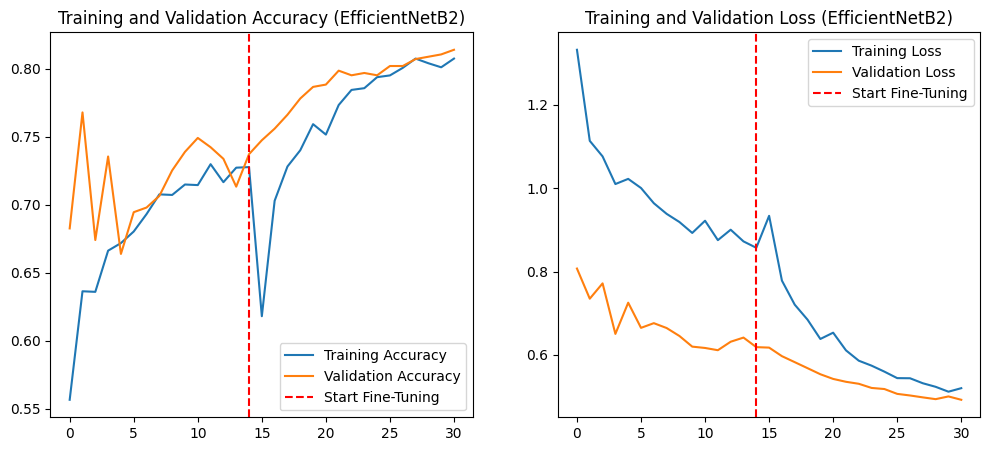


--- Evaluating final model on the unseen test set ---


733/733 ━━━━━━━━━━━━━━━━━━━━ 90s 120ms/step
Cohen's Kappa Score: 0.6588

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       361
           1       0.46      0.51      0.48        74
           2       0.72      0.71      0.72       200
           3       0.42      0.33      0.37        39
           4       0.54      0.36      0.43        59

    accuracy                           0.78       733
   macro avg       0.61      0.58      0.59       733
weighted avg       0.77      0.78      0.77       733



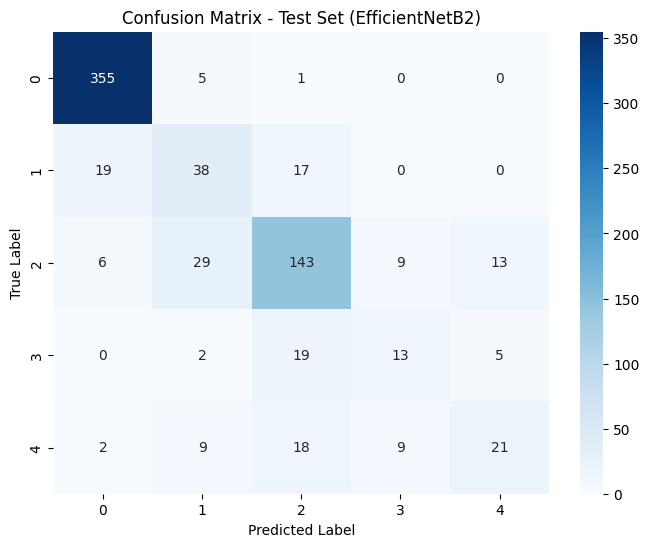

In [2]:
import pandas as pd
import os
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# CHANGED: Import EfficientNetB2 instead of B0
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# --- 1. SETUP AND PARAMETERS ---
SOURCE_IMAGE_DIR = 'C:/Users/I768800/Documents/MTech_Project/diabetic-retinopathy-MTech/data/full_dataset/train_images'
CSV_PATH = 'C:/Users/I768800/Documents/MTech_Project/diabetic-retinopathy-MTech/data/full_dataset/train.csv'
MODELS_DIR = '/models/'
RESULTS_DIR = '/results/'

# Create directories if they don't exist
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# Parameters
# CHANGED: Updated image size for EfficientNetB2
IMG_SIZE = 260
BATCH_SIZE = 32 # You may need to decrease this to 16 if you get memory errors
INITIAL_EPOCHS = 15
FINE_TUNE_EPOCHS = 15 # Increased for a more cautious approach
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

# --- 2. LOAD AND SPLIT THE FULL DATASET ---
print("--- Preparing Full DataFrame ---")
df = pd.read_csv(CSV_PATH)

# Format columns for the generator
df['id_code'] = df['id_code'].astype(str) + '.png'
df['diagnosis'] = df['diagnosis'].astype(str)

# Create a Train/Val/Test split
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['diagnosis'])
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df['diagnosis'])

print(f"Total images: {len(df)}")
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# --- 3. SETUP DATA GENERATORS ---
print("\n--- Setting up data generators ---")
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical'
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical'
)

test_generator = val_datagen.flow_from_dataframe(
    dataframe=test_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=1, class_mode='categorical', shuffle=False
)

# --- 4. HANDLE CLASS IMBALANCE ---
print("\n--- Calculating Class Weights to handle imbalance ---")
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Calculated Class Weights:", class_weights_dict)

# --- 5. BUILD THE MODEL (EfficientNetB2) ---
print("\n--- Building Model with EfficientNetB2 base ---")
# CHANGED: Use EfficientNetB2
base_model = EfficientNetB2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model built successfully.")

# --- 6. TRAIN THE MODEL (TWO-STAGE PROCESS) ---
callbacks = [
    ModelCheckpoint(
        filepath=os.path.join(MODELS_DIR, 'best_model_b2.h5'), # Changed filename for clarity
        save_best_only=True, monitor='val_accuracy', mode='max', verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1
    )
]

# Stage 1: Feature Extraction
print("\n--- Starting Stage 1: Feature Extraction ---")
history = model.fit(
    train_generator,
    epochs=INITIAL_EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=callbacks,
    class_weight=class_weights_dict
)

# Stage 2: Fine-Tuning
print("\n--- Starting Stage 2: Fine-Tuning ---")
base_model.trainable = True
# A cautious unfreeze point is still a good idea for a larger model
fine_tune_at = 200
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_generator,
    epochs=TOTAL_EPOCHS,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=callbacks
)
print("Training complete.")

# --- 7. PLOT FULL TRAINING HISTORY ---
print("\n--- Plotting Full Learning Curves ---")
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(INITIAL_EPOCHS - 1, color='r', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (EfficientNetB2)')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(INITIAL_EPOCHS - 1, color='r', linestyle='--', label='Start Fine-Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (EfficientNetB2)')

plt.savefig(os.path.join(RESULTS_DIR, 'b2_learning_curves.png'))
plt.show()

# --- 8. EVALUATE ON THE TEST SET ---
print("\n--- Evaluating final model on the unseen test set ---")
best_model = tf.keras.models.load_model(os.path.join(MODELS_DIR, 'best_model_b2.h5'))

predictions = best_model.predict(test_generator, steps=len(test_df))
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Metrics
kappa = cohen_kappa_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_labels)
print(f"Cohen's Kappa Score: {kappa:.4f}")
print("\nClassification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Test Set (EfficientNetB2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(os.path.join(RESULTS_DIR, 'b2_confusion_matrix.png'))
plt.show()

--- Preparing Full DataFrame ---
Total images: 3662
Training set size: 2343
Validation set size: 586
Test set size: 733

--- Setting up data generators ---
Found 2343 validated image filenames belonging to 5 classes.
Found 586 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.

--- Calculating Class Weights ---
Calculated Class Weights: {0: np.float64(0.4057142857142857), 1: np.float64(1.9772151898734178), 2: np.float64(0.7333333333333333), 3: np.float64(3.8097560975609754), 4: np.float64(2.4793650793650794)}

--- Building Model with EfficientNetB2 base ---
Model built successfully.

--- Starting Stage 1: Head Training ---


c:\Users\I768800\Documents\MTech_Project\diabetic-retinopathy-MTech\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5084 - loss: 1.4873
Epoch 1: val_accuracy improved from -inf to 0.60751, saving model to /models/best_model_b2_progressive.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.5087 - loss: 1.4864 - val_accuracy: 0.6075 - val_loss: 0.8636 - learning_rate: 0.0010
Epoch 2/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5940 - loss: 1.1834
Epoch 2: val_accuracy improved from 0.60751 to 0.66553, saving model to /models/best_model_b2_progressive.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5942 - loss: 1.1832 - val_accuracy: 0.6655 - val_loss: 0.7358 - learning_rate: 0.0010
Epoch 3/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6370 - loss: 1.1043
Epoch 3: val_accuracy improved from 0.66553 to 0.73720, saving model to /models/best_model_b2_progressive.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.6370 - loss: 1.1041 - val_accuracy: 0.7372 - val_loss: 0.6573 - learning_rate: 0.0010
Epoch 4/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6485 - loss: 1.0752
Epoch 4: val_accuracy improved from 0.73720 to 0.76451, saving model to /models/best_model_b2_progressive.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.6487 - loss: 1.0748 - val_accuracy: 0.7645 - val_loss: 0.6074 - learning_rate: 0.0010
Epoch 5/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6926 - loss: 0.9928
Epoch 5: val_accuracy did not improve from 0.76451
147/147 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.6925 - loss: 0.9927 - val_accuracy: 0.6894 - val_loss: 0.6626 - learning_rate: 0.0010
Epoch 6/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6869 - loss: 0.9841
Epoch 6: val_accuracy did not improve from 0.76451
147/147 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.6869 - loss: 0.9840 - val_accuracy: 0.7338 - val_loss: 0.6157 - learning_rate: 0.0010
Epoch 7/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6872 - loss: 0.9809
Epoch 7: val_accuracy did not improve from 0.76451

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
147/147 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.6872 - loss: 0.9809 - val_accura

147/147 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.7222 - loss: 0.7277 - val_accuracy: 0.8020 - val_loss: 0.5330 - learning_rate: 1.0000e-04
Epoch 16/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7885 - loss: 0.5669
Epoch 16: val_accuracy improved from 0.80205 to 0.81741, saving model to /models/best_model_b2_progressive.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.7885 - loss: 0.5670 - val_accuracy: 0.8174 - val_loss: 0.5063 - learning_rate: 1.0000e-04
Epoch 17/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7956 - loss: 0.5378
Epoch 17: val_accuracy did not improve from 0.81741
147/147 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.7956 - loss: 0.5378 - val_accuracy: 0.8140 - val_loss: 0.5021 - learning_rate: 1.0000e-04
Epoch 18/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8066 - loss: 0.5130
Epoch 18: val_accuracy improved from 0.81741 to 0.82082, saving model to /models/best_model_b2_progressive.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.8066 - loss: 0.5130 - val_accuracy: 0.8208 - val_loss: 0.4995 - learning_rate: 1.0000e-04
Epoch 19/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8245 - loss: 0.4822
Epoch 19: val_accuracy did not improve from 0.82082
147/147 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.8245 - loss: 0.4822 - val_accuracy: 0.8055 - val_loss: 0.5157 - learning_rate: 1.0000e-04
Epoch 20/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8447 - loss: 0.4444
Epoch 20: val_accuracy did not improve from 0.82082
147/147 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8446 - loss: 0.4446 - val_accuracy: 0.8140 - val_loss: 0.4997 - learning_rate: 1.0000e-04
Epoch 21/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8504 - loss: 0.4170
Epoch 21: val_accuracy did not improve from 0.82082

Epoch 21: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
147/147 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.8505 - loss: 


Epoch 24: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
147/147 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.8524 - loss: 0.3719 - val_accuracy: 0.8225 - val_loss: 0.5109 - learning_rate: 2.0000e-05
Epoch 25/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8672 - loss: 0.3656
Epoch 25: val_accuracy did not improve from 0.82253
147/147 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.8672 - loss: 0.3656 - val_accuracy: 0.8208 - val_loss: 0.5051 - learning_rate: 4.0000e-06

--- Starting Stage 3: Unfreezing Deeper Blocks (from block6a) ---
Unfreezing from layer block6a_expand_conv onwards.
Epoch 25/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8590 - loss: 0.3584
Epoch 25: val_accuracy did not improve from 0.82253
147/147 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.8590 - loss: 0.3584 - val_accuracy: 0.8174 - val_loss: 0.5027 - learning_rate: 1.0000e-05
Epoch 26/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8724 - loss: 0.3385
Epoc

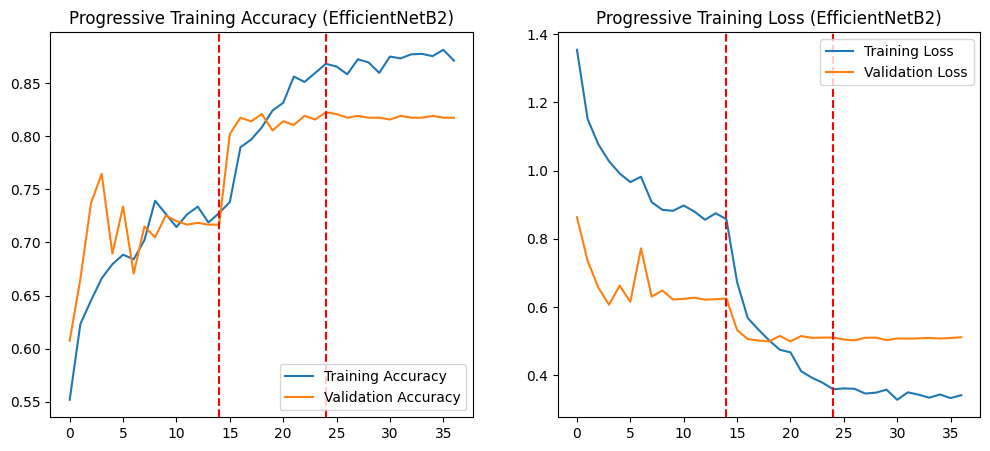


--- Evaluating final model on the unseen test set ---


733/733 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step
Cohen's Kappa Score: 0.6760

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       361
           1       0.45      0.59      0.51        74
           2       0.72      0.72      0.72       200
           3       0.65      0.33      0.44        39
           4       0.65      0.41      0.50        59

    accuracy                           0.79       733
   macro avg       0.68      0.61      0.63       733
weighted avg       0.79      0.79      0.78       733



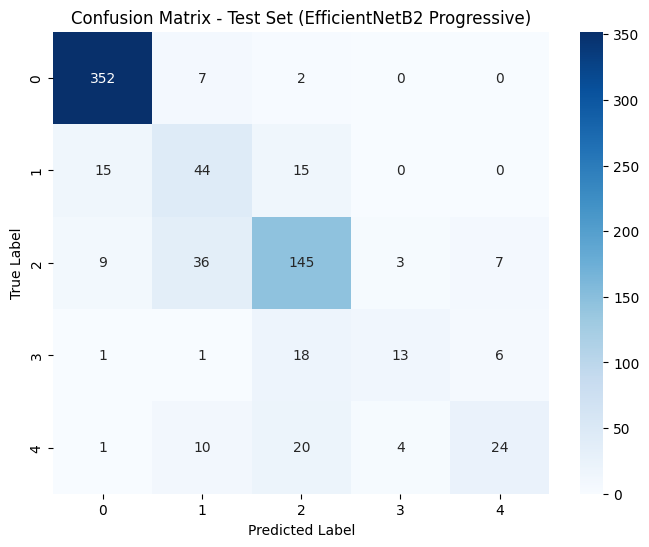

In [4]:
import pandas as pd
import os
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# --- 1. SETUP AND PARAMETERS ---
# NOTE: Corrected paths to be relative from the project root
SOURCE_IMAGE_DIR = 'C:/Users/I768800/Documents/MTech_Project/diabetic-retinopathy-MTech/data/full_dataset/train_images'
CSV_PATH = 'C:/Users/I768800/Documents/MTech_Project/diabetic-retinopathy-MTech/data/full_dataset/train.csv'
MODELS_DIR = '/models/'
RESULTS_DIR = '/results/'

os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# Parameters for Progressive Unfreezing
IMG_SIZE = 260
BATCH_SIZE = 16  # Smaller batch size for the larger B2 model
HEAD_TRAINING_EPOCHS = 15
STAGE_2_EPOCHS = 10
STAGE_3_EPOCHS = 10
LEARNING_RATE_STAGE_2 = 1e-4
LEARNING_RATE_STAGE_3 = 1e-5

# --- 2. LOAD AND SPLIT THE FULL DATASET ---
print("--- Preparing Full DataFrame ---")
df = pd.read_csv(CSV_PATH)
df['id_code'] = df['id_code'].astype(str) + '.png'
df['diagnosis'] = df['diagnosis'].astype(str)

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['diagnosis'])
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df['diagnosis'])

print(f"Total images: {len(df)}")
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# --- 3. SETUP DATA GENERATORS ---
print("\n--- Setting up data generators ---")
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,
    horizontal_flip=True, fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical'
)
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical'
)
test_generator = val_datagen.flow_from_dataframe(
    dataframe=test_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=1, class_mode='categorical', shuffle=False
)

# --- 4. HANDLE CLASS IMBALANCE ---
print("\n--- Calculating Class Weights ---")
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Calculated Class Weights:", class_weights_dict)

# --- 5. BUILD THE MODEL (EfficientNetB2) ---
print("\n--- Building Model with EfficientNetB2 base ---")
base_model = EfficientNetB2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
print("Model built successfully.")

# --- 6. TRAIN THE MODEL (PROGRESSIVE UNFREEZING) ---
callbacks = [
    ModelCheckpoint(
        filepath=os.path.join(MODELS_DIR, 'best_model_b2_progressive.h5'),
        save_best_only=True, monitor='val_accuracy', mode='max', verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1
    )
]
all_history = []

# Stage 1: Head Training
print("\n--- Starting Stage 1: Head Training ---")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(
    train_generator, epochs=HEAD_TRAINING_EPOCHS, validation_data=validation_generator,
    steps_per_epoch=len(train_generator), validation_steps=len(validation_generator),
    callbacks=callbacks, class_weight=class_weights_dict
)
all_history.append(history1)

# Stage 2: Unfreeze Top Blocks
print("\n--- Starting Stage 2: Unfreezing Top Blocks (from block7a) ---")
base_model.trainable = True
fine_tune_from_block7 = -1
for i, layer in enumerate(base_model.layers):
    if layer.name.startswith('block7a'):
        fine_tune_from_block7 = i
        break
if fine_tune_from_block7 > 0:
    for layer in base_model.layers[:fine_tune_from_block7]:
        layer.trainable = False
    print(f"Unfreezing from layer {base_model.layers[fine_tune_from_block7].name} onwards.")

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE_STAGE_2), loss='categorical_crossentropy', metrics=['accuracy'])
total_epochs_stage_2 = HEAD_TRAINING_EPOCHS + STAGE_2_EPOCHS
history2 = model.fit(
    train_generator, epochs=total_epochs_stage_2, initial_epoch=history1.epoch[-1],
    validation_data=validation_generator, steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator), callbacks=callbacks
)
all_history.append(history2)

# Stage 3: Unfreeze Deeper Blocks
print("\n--- Starting Stage 3: Unfreezing Deeper Blocks (from block6a) ---")
fine_tune_from_block6 = -1
for i, layer in enumerate(base_model.layers):
    if layer.name.startswith('block6a'):
        fine_tune_from_block6 = i
        break
if fine_tune_from_block6 > 0:
    for layer in base_model.layers[:fine_tune_from_block6]:
        layer.trainable = False
    print(f"Unfreezing from layer {base_model.layers[fine_tune_from_block6].name} onwards.")

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE_STAGE_3), loss='categorical_crossentropy', metrics=['accuracy'])
total_epochs_stage_3 = total_epochs_stage_2 + STAGE_3_EPOCHS
history3 = model.fit(
    train_generator, epochs=total_epochs_stage_3, initial_epoch=history2.epoch[-1],
    validation_data=validation_generator, steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator), callbacks=callbacks
)
all_history.append(history3)
print("\nProgressive Unfreezing complete.")

# --- 7. PLOT FULL TRAINING HISTORY ---
print("\n--- Plotting Full Learning Curves ---")
acc = sum([h.history['accuracy'] for h in all_history], [])
val_acc = sum([h.history['val_accuracy'] for h in all_history], [])
loss = sum([h.history['loss'] for h in all_history], [])
val_loss = sum([h.history['val_loss'] for h in all_history], [])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
stage_epochs = [HEAD_TRAINING_EPOCHS, STAGE_2_EPOCHS]
epochs_cumulative = np.cumsum(stage_epochs)
for epoch_end in epochs_cumulative:
    plt.axvline(x=epoch_end - 1, color='r', linestyle='--')
plt.title('Progressive Training Accuracy (EfficientNetB2)')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
for epoch_end in epochs_cumulative:
    plt.axvline(x=epoch_end - 1, color='r', linestyle='--')
plt.title('Progressive Training Loss (EfficientNetB2)')
plt.legend(loc='upper right')

plt.savefig(os.path.join(RESULTS_DIR, 'b2_progressive_learning_curves.png'))
plt.show()

# --- 8. EVALUATE ON THE TEST SET ---
print("\n--- Evaluating final model on the unseen test set ---")
best_model = tf.keras.models.load_model(os.path.join(MODELS_DIR, 'best_model_b2_progressive.h5'))
predictions = best_model.predict(test_generator, steps=len(test_df))
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

kappa = cohen_kappa_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_labels)
print(f"Cohen's Kappa Score: {kappa:.4f}")
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Test Set (EfficientNetB2 Progressive)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(os.path.join(RESULTS_DIR, 'b2_progressive_confusion_matrix.png'))
plt.show()

In [6]:
from tensorflow.keras.applications import EfficientNetB2, DenseNet121
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [7]:
print("\n--- Setting up DenseNet121 data generators ---")
IMG_SIZE_DENSENET = 224 # DenseNet standard size
train_datagen_densenet = ImageDataGenerator(preprocessing_function=densenet_preprocess, rotation_range=20, width_shift_range=0.1, horizontal_flip=True)
val_datagen_densenet = ImageDataGenerator(preprocessing_function=densenet_preprocess)
train_generator_densenet = train_datagen_densenet.flow_from_dataframe(
    dataframe=train_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE_DENSENET, IMG_SIZE_DENSENET), batch_size=BATCH_SIZE, class_mode='categorical'
)
validation_generator_densenet = val_datagen_densenet.flow_from_dataframe(
    dataframe=val_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE_DENSENET, IMG_SIZE_DENSENET), batch_size=BATCH_SIZE, class_mode='categorical'
)

# --- 7. BUILD AND TRAIN DENSENET121 ---
print("\n--- Building and Training DenseNet121 ---")
base_model_densenet = DenseNet121(input_shape=(IMG_SIZE_DENSENET, IMG_SIZE_DENSENET, 3), include_top=False, weights='imagenet')
base_model_densenet.trainable = False
x = base_model_densenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)
model_densenet = Model(inputs=base_model_densenet.input, outputs=predictions)

callbacks_densenet = [ModelCheckpoint(filepath=os.path.join(MODELS_DIR, 'best_model_densenet121.h5'), save_best_only=True, monitor='val_accuracy', mode='max', verbose=1),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)]

# Stage 1: Head Training
print("\n--- DenseNet Stage 1: Head Training ---")
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_densenet1 = model_densenet.fit(train_generator_densenet, epochs=15, validation_data=validation_generator_densenet, steps_per_epoch=len(train_generator_densenet), validation_steps=len(validation_generator_densenet), callbacks=callbacks_densenet, class_weight=class_weights_dict)

# Stage 2: Fine-Tuning
print("\n--- DenseNet Stage 2: Fine-Tuning ---")
base_model_densenet.trainable = True
for layer in base_model_densenet.layers[:-15]: # Unfreeze top 15 layers
    layer.trainable = False
model_densenet.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_densenet.fit(train_generator_densenet, epochs=30, initial_epoch=history_densenet1.epoch[-1], validation_data=validation_generator_densenet, steps_per_epoch=len(train_generator_densenet), validation_steps=len(validation_generator_densenet), callbacks=callbacks_densenet)
print("DenseNet121 training complete.")


# ##############################################################################
# PART 3: ENSEMBLE EVALUATION
# ##############################################################################
print("\n--- Evaluating ENSEMBLE model on the unseen test set ---")



--- Setting up DenseNet121 data generators ---
Found 2343 validated image filenames belonging to 5 classes.
Found 586 validated image filenames belonging to 5 classes.

--- Building and Training DenseNet121 ---
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

--- DenseNet Stage 1: Head Training ---


c:\Users\I768800\Documents\MTech_Project\diabetic-retinopathy-MTech\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4052 - loss: 1.7954
Epoch 1: val_accuracy improved from -inf to 0.68771, saving model to /models/best_model_densenet121.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.4059 - loss: 1.7933 - val_accuracy: 0.6877 - val_loss: 0.9304 - learning_rate: 0.0010
Epoch 2/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6074 - loss: 1.1753
Epoch 2: val_accuracy did not improve from 0.68771
147/147 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.6073 - loss: 1.1757 - val_accuracy: 0.6416 - val_loss: 0.8089 - learning_rate: 0.0010
Epoch 3/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6117 - loss: 1.1668
Epoch 3: val_accuracy improved from 0.68771 to 0.70137, saving model to /models/best_model_densenet121.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - accuracy: 0.6117 - loss: 1.1666 - val_accuracy: 0.7014 - val_loss: 0.8082 - learning_rate: 0.0010
Epoch 4/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6245 - loss: 1.1310
Epoch 4: val_accuracy improved from 0.70137 to 0.71331, saving model to /models/best_model_densenet121.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.6245 - loss: 1.1310 - val_accuracy: 0.7133 - val_loss: 0.7501 - learning_rate: 0.0010
Epoch 5/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6488 - loss: 1.0418
Epoch 5: val_accuracy improved from 0.71331 to 0.71672, saving model to /models/best_model_densenet121.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.6487 - loss: 1.0421 - val_accuracy: 0.7167 - val_loss: 0.7735 - learning_rate: 0.0010
Epoch 6/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6502 - loss: 1.0185
Epoch 6: val_accuracy did not improve from 0.71672
147/147 ━━━━━━━━━━━━━━━━━━━━ 370s 3s/step - accuracy: 0.6501 - loss: 1.0188 - val_accuracy: 0.6570 - val_loss: 0.7911 - learning_rate: 0.0010
Epoch 7/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6337 - loss: 1.0710
Epoch 7: val_accuracy did not improve from 0.71672
147/147 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.6336 - loss: 1.0710 - val_accuracy: 0.6809 - val_loss: 0.7362 - learning_rate: 0.0010
Epoch 8/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6364 - loss: 1.0318
Epoch 8: val_accuracy did not improve from 0.71672
147/147 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.6365 - loss: 1.0317 - val_accuracy: 0.5580 - val_loss: 1.0419 - learning_rate: 0.0010
Epoch 9/15
147/147 ━━━━━

147/147 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.6772 - loss: 0.9841 - val_accuracy: 0.7372 - val_loss: 0.6879 - learning_rate: 0.0010

--- DenseNet Stage 2: Fine-Tuning ---
Epoch 15/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4919 - loss: 1.6412
Epoch 15: val_accuracy did not improve from 0.73720
147/147 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.4920 - loss: 1.6401 - val_accuracy: 0.6519 - val_loss: 0.8106 - learning_rate: 1.0000e-05
Epoch 16/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5501 - loss: 1.1864
Epoch 16: val_accuracy did not improve from 0.73720
147/147 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.5502 - loss: 1.1861 - val_accuracy: 0.6536 - val_loss: 0.7999 - learning_rate: 1.0000e-05
Epoch 17/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6194 - loss: 0.9719
Epoch 17: val_accuracy did not improve from 0.73720
147/147 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.6193 - loss: 0.9719 - val_accuracy: 0.6792 - val_loss: 0.

147/147 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.6929 - loss: 0.7574 - val_accuracy: 0.7526 - val_loss: 0.6316 - learning_rate: 1.0000e-05
Epoch 22/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7322 - loss: 0.7209
Epoch 22: val_accuracy improved from 0.75256 to 0.77133, saving model to /models/best_model_densenet121.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 371s 3s/step - accuracy: 0.7321 - loss: 0.7210 - val_accuracy: 0.7713 - val_loss: 0.6118 - learning_rate: 1.0000e-05
Epoch 23/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7297 - loss: 0.7040
Epoch 23: val_accuracy improved from 0.77133 to 0.79010, saving model to /models/best_model_densenet121.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.7296 - loss: 0.7042 - val_accuracy: 0.7901 - val_loss: 0.5960 - learning_rate: 1.0000e-05
Epoch 24/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7261 - loss: 0.7074
Epoch 24: val_accuracy improved from 0.79010 to 0.79863, saving model to /models/best_model_densenet121.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.7262 - loss: 0.7072 - val_accuracy: 0.7986 - val_loss: 0.5801 - learning_rate: 1.0000e-05
Epoch 25/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7254 - loss: 0.7027
Epoch 25: val_accuracy did not improve from 0.79863
147/147 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.7254 - loss: 0.7027 - val_accuracy: 0.7935 - val_loss: 0.5791 - learning_rate: 1.0000e-05
Epoch 26/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7347 - loss: 0.6671
Epoch 26: val_accuracy did not improve from 0.79863
147/147 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.7348 - loss: 0.6672 - val_accuracy: 0.7969 - val_loss: 0.5721 - learning_rate: 1.0000e-05
Epoch 27/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7331 - loss: 0.6697
Epoch 27: val_accuracy improved from 0.79863 to 0.80034, saving model to /models/best_model_densenet121.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 405s 3s/step - accuracy: 0.7332 - loss: 0.6697 - val_accuracy: 0.8003 - val_loss: 0.5657 - learning_rate: 1.0000e-05
Epoch 28/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7542 - loss: 0.6687
Epoch 28: val_accuracy did not improve from 0.80034
147/147 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.7542 - loss: 0.6686 - val_accuracy: 0.7969 - val_loss: 0.5640 - learning_rate: 1.0000e-05
Epoch 29/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7553 - loss: 0.6379
Epoch 29: val_accuracy did not improve from 0.80034
147/147 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.7552 - loss: 0.6380 - val_accuracy: 0.7969 - val_loss: 0.5653 - learning_rate: 1.0000e-05
Epoch 30/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7528 - loss: 0.6576
Epoch 30: val_accuracy did not improve from 0.80034
147/147 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.7528 - loss: 0.6576 - val_accuracy: 0.7935 - val_loss: 0.5649 - learning_rate: 1.0000e-05
De

In [9]:
print("\n--- Evaluating ENSEMBLE model on the unseen test set ---")

# --- 8. LOAD BOTH BEST MODELS ---
model_b2 = tf.keras.models.load_model(os.path.join(MODELS_DIR, 'best_model_b2_progressive.h5'))
model_densenet = tf.keras.models.load_model(os.path.join(MODELS_DIR, 'best_model_densenet121.h5'))

# --- 9. CREATE TEST GENERATORS FOR EACH MODEL ---
test_datagen_b2 = ImageDataGenerator(preprocessing_function=efficientnet_preprocess)
test_generator_b2 = test_datagen_b2.flow_from_dataframe(
    dataframe=test_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=1, class_mode='categorical', shuffle=False
)
test_datagen_densenet = ImageDataGenerator(preprocessing_function=densenet_preprocess)
test_generator_densenet = test_datagen_densenet.flow_from_dataframe(
    dataframe=test_df, directory=SOURCE_IMAGE_DIR, x_col='id_code', y_col='diagnosis',
    target_size=(IMG_SIZE_DENSENET, IMG_SIZE_DENSENET), batch_size=1, class_mode='categorical', shuffle=False
)


--- Evaluating ENSEMBLE model on the unseen test set ---


Found 733 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [13]:
# --- Get Predictions and Average Them ---
print("Generating predictions from both models...")
preds_b2 = model_b2.predict(test_generator_b2, steps=len(test_df))
preds_densenet = model_densenet.predict(test_generator_densenet, steps=len(test_df))

ensemble_preds = (preds_b2 + preds_densenet) / 2.0
y_pred = np.argmax(ensemble_preds, axis=1)
y_true = test_generator_b2.classes
class_labels = list(test_generator_b2.class_indices.keys())

Generating predictions from both models...
733/733 ━━━━━━━━━━━━━━━━━━━━ 48s 65ms/step
733/733 ━━━━━━━━━━━━━━━━━━━━ 78s 106ms/step



ENSEMBLE Cohen's Kappa Score: 0.6828

ENSEMBLE Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       361
           1       0.48      0.59      0.53        74
           2       0.74      0.76      0.75       200
           3       0.63      0.31      0.41        39
           4       0.64      0.39      0.48        59

    accuracy                           0.79       733
   macro avg       0.68      0.60      0.62       733
weighted avg       0.79      0.79      0.79       733



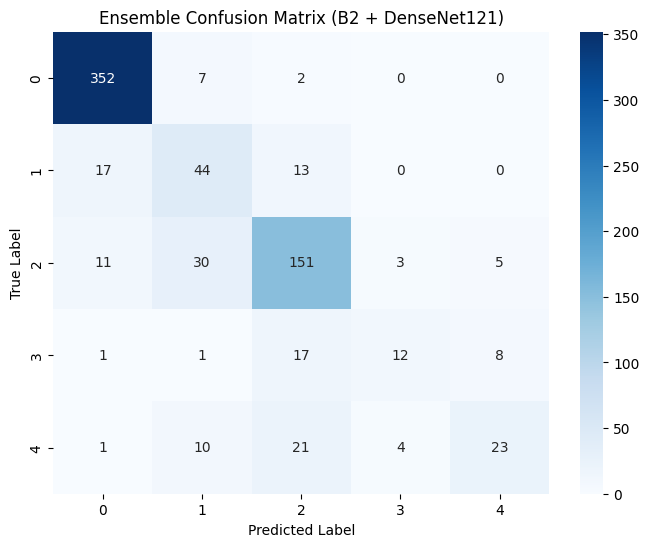

In [14]:
# --- Calculate Final Ensemble Metrics ---
kappa = cohen_kappa_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_labels)
print(f"\nENSEMBLE Cohen's Kappa Score: {kappa:.4f}")
print("\nENSEMBLE Classification Report:")
print(report)

# --- Plot Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Ensemble Confusion Matrix (B2 + DenseNet121)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(os.path.join(RESULTS_DIR, 'ensemble_confusion_matrix.png'))
plt.show()